# 0. Contents

1. Creation of region column

2. Creation of spending flag

3. Bar graph of spending flag

4. Creation of acitivity flag 

5. Creation of active customer dataframe

6. Creation of customer profiles

7. Profile distribution bar graph

8. Profile habits analysis

9. Profile by region analysis

10. Profile by department analysis

11. Profile by region and department analysis

# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating the main path 
path = r'C:\Users\muffi\OneDrive\CareerFoundry\Instacart Basket Analysis 2023'

In [3]:
# importing complete data set
df_main = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [25]:
# importing department dictionary data
df_dict = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = 0)

# 2. Security Implications

In [ ]:
# checking the given information
df_main.head()

The dataset contains full names, ages, and states, which are considers PII. For the purpse of this exercise, the names have been changed to protect the privacy of the customers. Age and state by themselves arwe not enough to indentitfy an individual, and thus are safe to work with for the remainder of the project

# 3. Spending Habits by Region

Instacart is interested in sales by region. Create a regions using the State column. Determine if there are spending difference between the different regions.

## 3.1. Region Column

In [4]:
# region 1: ME, NH, VT, MA, RI, CT, NY, PA, NJ
# indicating region 1 states in the region col
df_main.loc[df_main['state'].isin(['Maine', 
                                   'New Hampshire',
                                   'Vermont',
                                   'Massachusetts',
                                   'Rhode Island',
                                   'Connecticut',
                                   'New York',
                                   'Pennsylvania',
                                   'New Jersey',]), 'region'] = 1

In [5]:
# Region 2: WI, MI, IL, IN, OH, ND, SD, NE, KS, MN, IA, MS
# indicating the regions 2 states in the region col
df_main.loc[df_main['state'].isin(['Wisconsin',
                                   'Michigan',
                                   'Illinois',
                                   'Indiana',
                                   'Ohio',
                                   'North Dakota',
                                   'South Dakota',
                                   'Nebraska',
                                   'Kansas',
                                   'Minnesota',
                                   'Iowa',
                                   'Missouri',
                                  ]), 'region'] = 2

In [6]:
# Region 3: DE, MD, D.C., VA, WV, NC, SC, GA, FL, KY, TN, MI, AL. OK, TX, AR, LA
df_main.loc[df_main['state'].isin(['Delaware',
                                  'Maryland',
                                  'District of Columbia',
                                  'Virginia',
                                  'West Virginia',
                                  'North Carolina',
                                  'South Carolina',
                                  'Georgia',
                                  'Florida',
                                  'Kentucky',
                                  'Tennessee',
                                  'Mississippi',
                                  'Alabama',
                                  'Oklahoma',
                                  'Texas',
                                  'Arkansas',
                                  'Louisiana']), 'region'] = 3

In [12]:
# Region 4: ID, MT, WY, NV, UT, CO, AZ, NM, AK, WA, OR, CA, HW
df_main.loc[df_main['state'].isin(['Idaho',
                                  'Montana',
                                  'Wyoming',
                                  'Nevada',
                                  'Utah',
                                  'Colorado',
                                  'Arizona',
                                  'Alaska',
                                  'New Mexico',
                                  'Washington',
                                  'Oregon',
                                  'California',
                                  'Hawaii'
                                   ]), 'region'] = 4

In [13]:
# checking region col 
df_main['region'].value_counts(dropna = False)

3.0    10791885
4.0     8292913
2.0     7597325
1.0     5722736
Name: region, dtype: int64

In [14]:
# Finding NaN states 
df_main[df_main['region'].isnull()]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,last_name,sex,state,age,date_joined,number_of_dependents,fam_status,income,_merge,region


## 3.2. Spending Trends by Region

In [15]:
# listing the col names
df_main.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'med_order_freq', 'freq_flag', 'first_name',
       'last_name', 'sex', 'state', 'age', 'date_joined',
       'number_of_dependents', 'fam_status', 'income', '_merge', 'region'],
      dtype='object')

In [16]:
# crossing the region and spending crosstab
region_spending = pd.crosstab(df_main['region'], df_main['spending_flag'], dropna = False)

In [ ]:
# viewing the crosstab 
region_spending

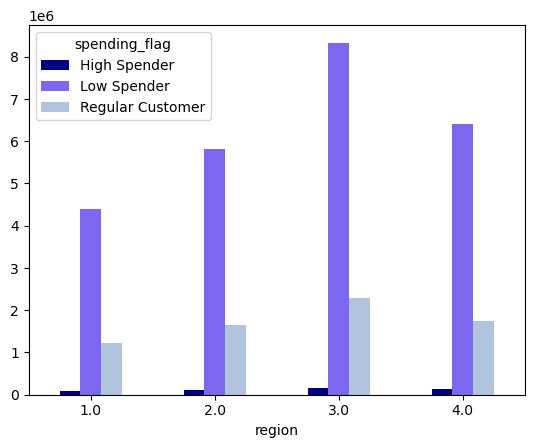

In [17]:
# bar graph for the spending flag distribution 
region_bar = region_spending.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue'])

Region 3 has the most customers in every category. Region 2 and Region 4 have nearly identical spending habits. Region 1 has the fewest number of customers in every metric. 

In [18]:
# exporting the bar graph
# loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))
region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_spending_bar.png'))

# 4. Active Customer Dataset 

The CFO wants a subset of the data that only include active customers (more than 5 orders). The exported dataset should not have any low-activity customers

In [19]:
# creating the low_activity flag
df_main.loc[df_main['max_order'] < 5, 'activity_flag'] = 'low activity'

In [20]:
# creating the good_activity 
df_main.loc[df_main['max_order'] >= 5, 'activity_flag'] = 'good activity'

In [21]:
# checking the activity flag
df_main['activity_flag'].value_counts(dropna = False)

good activity    30964564
low activity      1440295
Name: activity_flag, dtype: int64

In [22]:
# creating the subset dataframe without low-acitivity customers
df_active_users = df_main.loc[df_main['activity_flag'] == 'good activity']

In [23]:
# checking the active users table
df_active_users.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,sex,state,age,date_joined,number_of_dependents,fam_status,income,_merge,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,2.0,good activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,2.0,good activity
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,2.0,good activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,2.0,good activity
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,2.0,good activity


In [24]:
# exporting the sample
df_active_users.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_users_sample.pkl'))

# 5. Customer Profiling 

The marketing team wants customer profiles based on age, income, certain goods in the “department_id” column, and number of dependents. Create the different profiles under a profile flag

In [ ]:
# descriptive statistics on the age, income, and number of dependents parameters
df_main[['age', 'income', 'number_of_dependents' ]].describe()

In [ ]:
# checking the departments
df_dict

Purchases from department 18 with >= 1 dependent would indicate new parent 

18 <= age < 30 is young adult

30 <= age < 50 adult

50 <= old adult

No dependents means single adult

Income less than 50k with more than 1 dependent means single parent

In [26]:
# new parent profile (including parents that have a new babies but multiple children)
df_main.loc[(df_main['number_of_dependents'] >= 1) &  (df_main['department_id'] == 18), 'profile'] = 'New Parent'

In [27]:
# single adult profile
df_main.loc[(df_main['number_of_dependents'] == 0) &  (df_main['age'] < 65), 'profile'] = 'Single Adult'

In [28]:
# single parent profile
df_main.loc[(df_main['number_of_dependents'] >= 1) & (df_main['income'] < 50000) &  (df_main['department_id'] != 18), 'profile'] = 'Single Parent'

In [29]:
# partnered parent profile
df_main.loc[(df_main['number_of_dependents'] >= 1) & (df_main['income'] >= 50000) &  (df_main['department_id'] != 18), 'profile'] = 'Partnered Parent'

In [30]:
# retired adult profile
df_main.loc[(df_main['number_of_dependents'] == 0) &  (df_main['age'] >= 65), 'profile'] = 'Retired Adult'

In [31]:
# checking for profiles
df_main['profile'].value_counts(dropna = False)

Partnered Parent    21323133
Single Adult         5977419
Single Parent        2666915
Retired Adult        2120084
New Parent            317308
Name: profile, dtype: int64

# 6. Profile Distribution

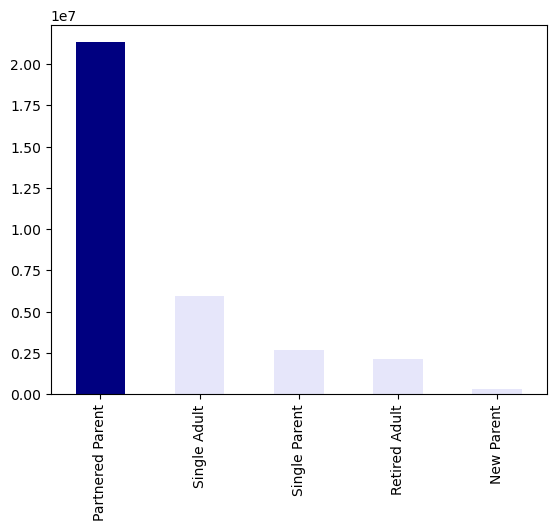

In [32]:
# profie distibution 
profile_dist_bar = df_main['profile'].value_counts().plot.bar(color = ['navy', 'lavender', 'lavender', 'lavender', 'lavender'])

In [33]:
# exporting the visualiation
profile_dist_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_distibution_bar.png'))

Most customers are partnered parents followed by single adults, single parents, retired adults, and new parents

# 7. Profile Aggregation

Aggregate the max, mean, and min variables of the customer profiles for usage frequency and expenditure

In [34]:
# grouping profiles by mean, max, and min expenditure 
df_main.groupby('profile').agg({'prices' : ['mean', 'max', 'min']})

prices           
                      mean   max  min
profile                              
New Parent        7.650679  15.0  1.0
Partnered Parent  7.931017  25.0  1.0
Retired Adult     7.801944  25.0  1.0
Single Adult      7.785729  25.0  1.0
Single Parent     6.691449  25.0  1.0

In [35]:
# grouping profiles by mean, max, and min usage frequency (with days_since_prior_order)
df_main.groupby('profile').agg({'days_since_prior_order' : ['mean', 'max', 'min']})

days_since_prior_order           
                                   mean   max  min
profile                                           
New Parent                     9.437370  30.0  0.0
Partnered Parent              10.367530  30.0  0.0
Retired Adult                 10.353063  30.0  0.0
Single Adult                  10.378378  30.0  0.0
Single Parent                 10.770852  30.0  0.0

Partnered parents spend the most on average, but single parents use the service the most 

# 8. Customer Profiles by Region and Department

Compare the profiles with regions and departments. Are there any links? 

## 8.1. Profiles by Region

In [36]:
# crosstab comparing profiles and region
regional_profiles = pd.crosstab(df_main['profile'], df_main['region'])

In [37]:
# checking the regional profiles crosstab
regional_profiles

region,1.0,2.0,3.0,4.0
profile,,,,
New Parent,56621,73594,107309,79784
Partnered Parent,3788490,4991867,7080228,5462548
Retired Adult,395847,492762,691055,540420
Single Adult,1022454,1412438,2010604,1531923
Single Parent,459324,626664,902689,678238


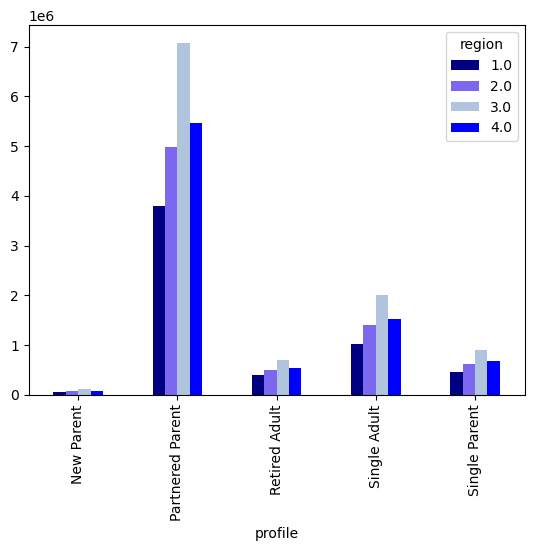

In [38]:
regional_profiles_bar = regional_profiles.plot.bar( color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue'])

In [39]:
# creating a crosstab of the profiles by region
prof_by_reg = pd.crosstab(df_main['region'], df_main['profile'])

In [40]:
# checking the profile be region crossbar
prof_by_reg

profile,New Parent,Partnered Parent,Retired Adult,Single Adult,Single Parent
region,,,,,
1.0,56621,3788490,395847,1022454,459324
2.0,73594,4991867,492762,1412438,626664
3.0,107309,7080228,691055,2010604,902689
4.0,79784,5462548,540420,1531923,678238


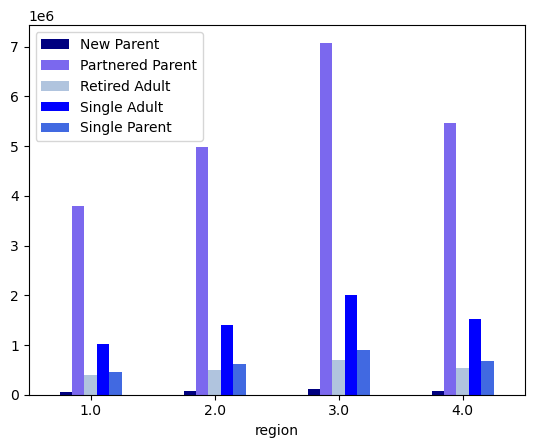

In [41]:
# creating a bar chart showing profiles by region
prof_by_reg_bar = prof_by_reg.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])
plt.legend(loc = 'best')

In [42]:
# exporting the profile by region bar graph
prof_by_reg_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_region_bar.png'))

Partnered parents spend have the most purchases in all regions followed by single adults, single parents, retired adults, and nwe parents, respectively. New parents are nearly equally represented in every region. Region 3 has the most purchases

## 8.2. Profiles by department

In [43]:
# creating crosstab of profiles by departments
prof_by_dep = pd.crosstab(df_main['department_id'], df_main['profile'])

In [44]:
# checking the prof by dep crosstab
prof_by_dep

profile,New Parent,Partnered Parent,Retired Adult,Single Adult,Single Parent
department_id,,,,,
1,0,1502578,148333,408827,175005
2,0,24102,2291,6884,3014
3,0,791765,76021,218384,86258
4,0,6442856,623025,1752420,660990
5,0,99495,9764,29354,15083
6,0,184106,17494,50219,17434
7,0,1709435,176427,498015,304246
8,0,66211,7024,17559,6922
9,0,598751,56303,158959,52614


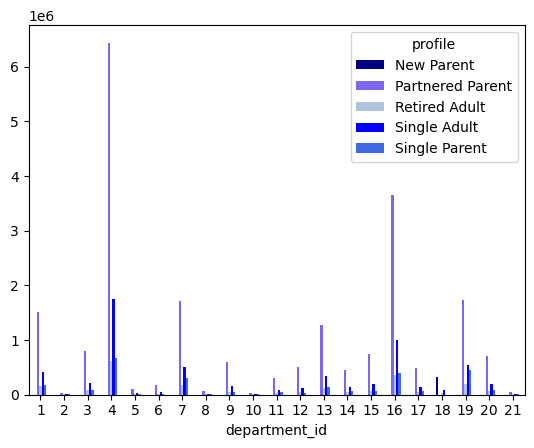

In [45]:
# visualizing the relationship between department and profile
prof_by_dep_bar = prof_by_dep.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

In [46]:
# exporting the profiles by department bar graph
prof_by_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_department.png'))

Most purchases are from partnered parents by produce, eggs, and dairy. Single and retired adults follow the same spending habits. Single parents also make the most puchases in produce by purchase nearly equal amounts of snack as dairy and eggs. 

## 8.3. Comparing Regional Profiles by Department 

### 8.3.1. Creating and checking regions

In [47]:
# creating region 1 df
df_reg_1 = df_main.loc[df_main['region'] == 1]

In [48]:
# checking region 1 df
df_reg_1['region'].value_counts(dropna = False)

1.0    5722736
Name: region, dtype: int64

In [49]:
# creating region 2 df
df_reg_2 = df_main.loc[df_main['region'] == 2]

In [50]:
# checking region 2 df
df_reg_2['region'].value_counts(dropna = False)

2.0    7597325
Name: region, dtype: int64

In [51]:
# creating region 3 df
df_reg_3 = df_main.loc[df_main['region'] == 3]

In [52]:
# checking region 3 df
df_reg_3['region'].value_counts(dropna = False)

3.0    10791885
Name: region, dtype: int64

In [53]:
# creating region 4 df
df_reg_4 = df_main.loc[df_main['region'] == 4]

In [54]:
# checking region 4 df
df_reg_4['region'].value_counts(dropna = False)

4.0    8292913
Name: region, dtype: int64

### 8.3.2. Creating cross tabs

In [55]:
# crosstab for region 1
reg_1_cross = pd.crosstab(df_reg_1['department_id'], df_reg_1['profile'])

In [56]:
# crosstab for region 2
reg_2_cross = pd.crosstab(df_reg_2['department_id'], df_reg_2['profile'])

In [57]:
# crosstab for region 3
reg_3_cross = pd.crosstab(df_reg_3['department_id'], df_reg_3['profile'])

In [58]:
# crosstab for region 4
reg_4_cross = pd.crosstab(df_reg_4['department_id'], df_reg_4['profile'])

### 8.3.3. Creating visualizations

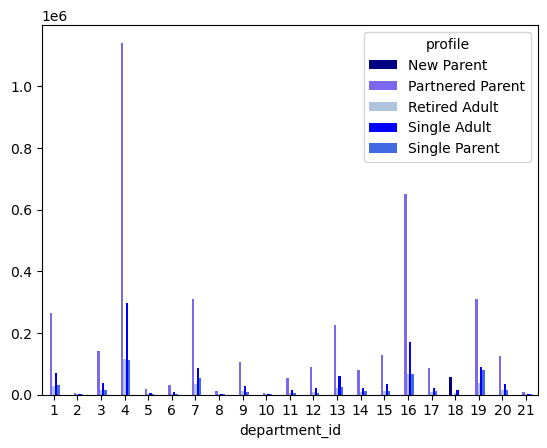

In [59]:
# bar graph of the region 1 profiles be department
reg_1_prof_dep_bar = reg_1_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

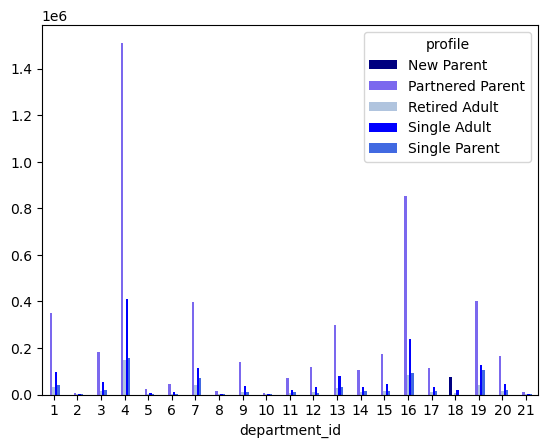

In [60]:
# bar graph of the region 2 profiles be department
reg_2_prof_dep_bar = reg_2_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

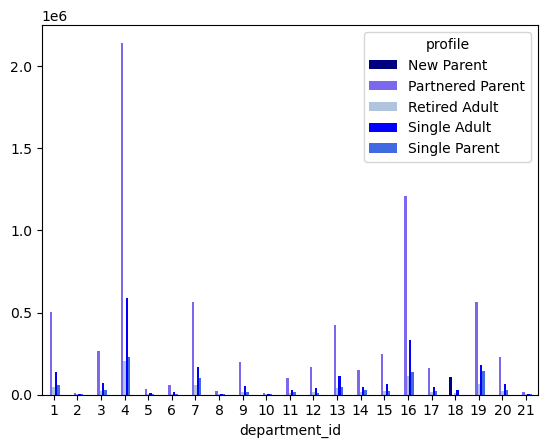

In [61]:
# bar graph of the region 3 profiles be department
reg_3_prof_dep_bar = reg_3_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

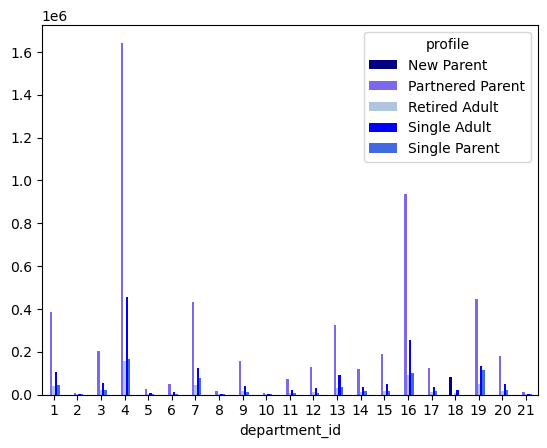

In [62]:
# bar graph of the region 4 profiles be department
reg_4_prof_dep_bar = reg_4_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

In [63]:
# exporting the region 1 bar chart
reg_1_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_1_profiles_by_department.png'))

In [64]:
# exporting the region 2 bar chart
reg_2_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_2_profiles_by_department.png'))

In [65]:
# exporting the region 3 bar chart
reg_3_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_3_profiles_by_department.png'))

In [66]:
# exporting the region 4 bar chart
reg_4_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_4_profiles_by_department.png'))

The department trends previously mentioned are the same for each region.

# 9. Exporting Dataframe

In [67]:
df_main.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_final.pkl'))

In [71]:
df_main['price_range_loc'].value_counts()

Low-range product     10126321
Mid-range product       652638
High-range product      417678
Name: price_range_loc, dtype: int64